<a href="https://colab.research.google.com/github/yaspalsingh115/Machine-learning/blob/master/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis of Car Features**

---



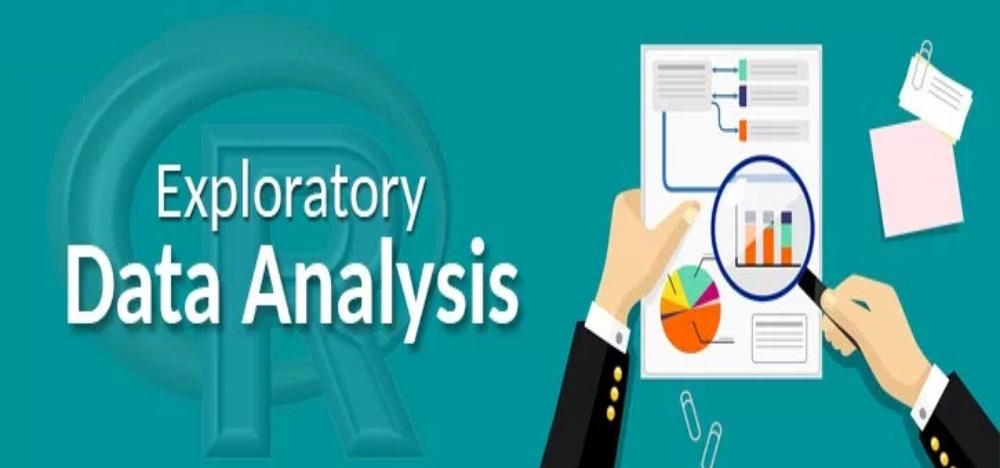

# **1.**  Importing the required libraries for **EDA**

---






In [140]:
#importing some necessary librairies below: 
import pandas as pd                  # linear algebra
import numpy as np                   # data processing, CSV file I/O
import matplotlib.pyplot as plt      # Matlab-style plotting  (Visualisation)
%matplotlib inline

In [141]:
from scipy import stats
from scipy.stats import norm, skew   # for some statistics

In [142]:
import seaborn as sns                # Visualisation
color = sns.color_palette()
sns.set_style('darkgrid')

In [143]:
import warnings
def ignore_warn(*args, **kwargs):
     pass
warnings.war = ignore_warn           # ignore warnings (from sklearn and seaborn)

# `1.1  Loading the dataset into data frame.`



In [144]:
url ='https://raw.githubusercontent.com/yaspalsingh115/Machine-learning/master/data.csv'    # uploading the url of dataset from github
df = pd.read_csv(url)

# Dataset is now stored in a Pandas Dataframe

In [145]:
# To see the number of rows and columns of the table
df.shape

(11914, 16)

In [146]:
# To see first 5 rows of data
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [147]:
# To see the bottom 5 rows of data
df.tail()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


# 1.2  Checking the types of data and basic summary stats

Here, we will see the types of data whether the given data is stroed as a integer type or as a string type or else.
It will be good to enalize the datatypes as the given data contains different datatypes. If we have to plot any graph between two different sets then both will have same datatypes (i.e., In the given dataset, as MSRP or the price of the car would be stored as a integer. In that case, we can plot the data via a graph. If the values are stored as a string and we want to plot a graph to represent the data then we will have to convert the values into integer type).


In [148]:
df.dtypes               # Here, displaying data types of the columns

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [149]:
# To check the datatype and information of the table
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [150]:
# Here, we are using describe() function which gives us something interesting values(like count, mean, standard devation,min value,max value etc)
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


Here, we are going to calculate the total number of cars for each brands.
For example, there are total 449 cars of Honda.

In [151]:
# For count the number of vehicles under all brands
df.Make.value_counts()

Chevrolet        1123
Ford              881
Volkswagen        809
Toyota            746
Dodge             626
Nissan            558
GMC               515
Honda             449
Mazda             423
Cadillac          397
Mercedes-Benz     353
Suzuki            351
BMW               334
Infiniti          330
Audi              328
Hyundai           303
Volvo             281
Subaru            256
Acura             252
Kia               231
Mitsubishi        213
Lexus             202
Buick             196
Chrysler          187
Pontiac           186
Lincoln           164
Oldsmobile        150
Land Rover        143
Porsche           136
Saab              111
Aston Martin       93
Plymouth           82
Bentley            74
Ferrari            69
FIAT               62
Scion              60
Maserati           58
Lamborghini        52
Rolls-Royce        31
Lotus              29
Tesla              18
HUMMER             17
Maybach            16
Alfa Romeo          5
McLaren             5
Genesis   

In [152]:
# To see unique brands of Vehicles
df.Make.unique()

array(['BMW', 'Audi', 'FIAT', 'Mercedes-Benz', 'Chrysler', 'Nissan',
       'Volvo', 'Mazda', 'Mitsubishi', 'Ferrari', 'Alfa Romeo', 'Toyota',
       'McLaren', 'Maybach', 'Pontiac', 'Porsche', 'Saab', 'GMC',
       'Hyundai', 'Plymouth', 'Honda', 'Oldsmobile', 'Suzuki', 'Ford',
       'Cadillac', 'Kia', 'Bentley', 'Chevrolet', 'Dodge', 'Lamborghini',
       'Lincoln', 'Subaru', 'Volkswagen', 'Spyker', 'Buick', 'Acura',
       'Rolls-Royce', 'Maserati', 'Lexus', 'Aston Martin', 'Land Rover',
       'Lotus', 'Infiniti', 'Scion', 'Genesis', 'HUMMER', 'Tesla',
       'Bugatti'], dtype=object)

In [153]:
df.columns             # Here, displaying all the column names

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [154]:
# To count number of null values in each columns
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [155]:
# To count total number of null values in whole data
df.isnull().sum().sum()

3850

In [156]:
# To know about the percentage of missing values
df_missing = (df.isnull().sum() / len(df)) * 100
df_missing = df_missing.drop(df_missing[df_missing == 0].index).sort_values(ascending = False)
missing_data = pd.DataFrame({'Missing Percentage' : df_missing})
missing_data
    

,Missing Percentage
Market Category,31.408427
Engine HP,0.579151
Engine Cylinders,0.251805
Number of Doors,0.050361
Engine Fuel Type,0.025180


## **2. Dropping irrelevant columns**

---



Sometimes, dropping is necessary in EDA.
It's a good practive to keep the relevant data for further proccessing.
If any columns in datasets is of less relevance then its better to drop it.

In this case, the columns such as Number of doors and Market Category(as it contains lots of null values) maynot be very relevant. So, we are going to drop them.

In [157]:
# dropping the "Number of Doors, Market Category" columns
df.drop(['Number of Doors', 'Market Category'], axis=1, inplace=True)
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


# **3.  Renaming the columns**

---



As in the given data, many columns names are confusing. So, in this section, we are going to rename the column names. So that, we can easily read them.

Basically, we change the column names when they are confusing and not readable. In such case, its a good practice to rename column names to improve readability of the data.

In [158]:
# Renaming some columns as given in objective of our project
df.rename({'Engine HP':'HP','Engine Cylinders':'Cylinders','Transmission Type':'Transmission','Driven_Wheels':'Drive Mode','highway MPG':'MPG-H','city mpg':'MPG-C','MSRP':'Price'}, axis=1, inplace=True)
df.head()

,Make,Model,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


## 4. **Checking and dropping duplicate rows** 

---



It is obvious that data can contain some duplicate values. As the given data is huge data set containing more than 10,000 rows often have some duplicate values.



Here, displaying all the duplicate values

In [159]:
# to see all duplicates values
duplicate_row = df[df.duplicated()]
print(duplicate_row)

         Make     Model  Year  ... MPG-C  Popularity  Price
14        BMW  1 Series  2013  ...    19        3916  31500
18       Audi       100  1992  ...    17        3105   2000
20       Audi       100  1992  ...    17        3105   2000
24       Audi       100  1993  ...    17        3105   2000
25       Audi       100  1993  ...    17        3105   2000
...       ...       ...   ...  ...   ...         ...    ...
11481  Suzuki      X-90  1998  ...    22         481   2000
11603   Volvo      XC60  2017  ...    20         870  46350
11604   Volvo      XC60  2017  ...    23         870  40950
11708  Suzuki       XL7  2008  ...    15         481  29149
11717  Suzuki       XL7  2008  ...    16         481  27499

[721 rows x 14 columns]


Now, we are going to drop all the existing duplicate values by using drop_duplicates()

In [160]:
df.drop_duplicates()        # Now, dropping all the duplicates values from the datasets

,Make,Model,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,Midsize,4dr Hatchback,23,16,204,50920


In [161]:
df.shape       # After dropping duplicate values. Checking rows and columns of dataset.

(11914, 14)

## 4.1  Filling the missing or null values

Here, all the missing or null values are detected and are filled later. It is a best approach to replace the missing values with the mean or the average of that column. Repalcing is better because it provide good perfomance to model(as more the data, a model has the better it performs)

In [162]:
df.isnull().sum()        # Looking for null values in dataset.

Make                 0
Model                0
Year                 0
Engine Fuel Type     3
HP                  69
Cylinders           30
Transmission         0
Drive Mode           0
Vehicle Size         0
Vehicle Style        0
MPG-H                0
MPG-C                0
Popularity           0
Price                0
dtype: int64

As we have calculated the null values in above part. Now, we are going to replace them with median.

In [163]:
# replacing all the missing value with median
df.fillna(df.median(), inplace=True)
df.isnull().sum() 

Make                0
Model               0
Year                0
Engine Fuel Type    3
HP                  0
Cylinders           0
Transmission        0
Drive Mode          0
Vehicle Size        0
Vehicle Style       0
MPG-H               0
MPG-C               0
Popularity          0
Price               0
dtype: int64

In [164]:
df = df.fillna(df.mode().iloc[0])
df.isnull().sum()         # After dropping null values, checking is all columns have no null values.

Make                0
Model               0
Year                0
Engine Fuel Type    0
HP                  0
Cylinders           0
Transmission        0
Drive Mode          0
Vehicle Size        0
Vehicle Style       0
MPG-H               0
MPG-C               0
Popularity          0
Price               0
dtype: int64

## **5.  Detecting Outliers**

---



**Box Plot** graphically depicting groups of numerical data through their quartiles. Lines extending vertically from the boxes indicating variability outside the upper and lower quartiles. Outliers may be plotted as individual points.

**Plotting some graphs below :**

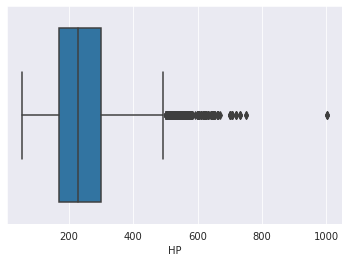

In [165]:
sns.boxplot(x = df['HP'])

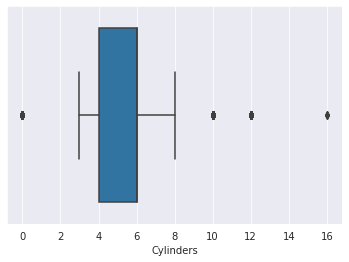

In [166]:
sns.boxplot(x = df['Cylinders'])

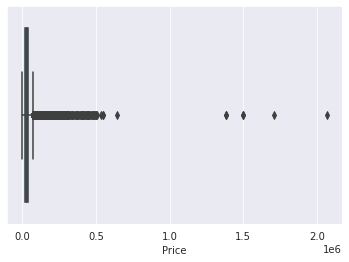

In [167]:
sns.boxplot(x = df['Price'])

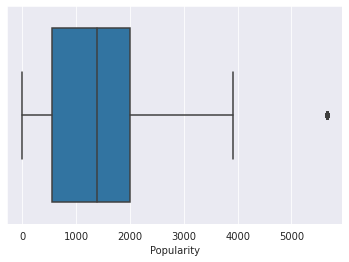

In [168]:
sns.boxplot(x = df['Popularity'])

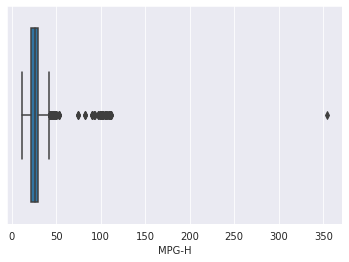

In [169]:
sns.boxplot(x = df['MPG-H'])

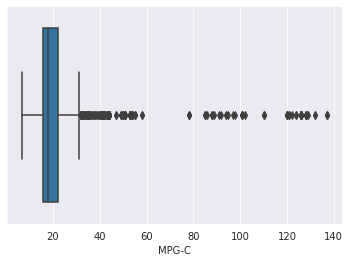

In [170]:
sns.boxplot(x = df['MPG-C'])

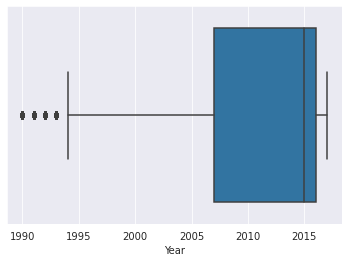

In [171]:
sns.boxplot(x = df['Year'])

# 5.1  Removing all the outliers

As, we have seen outliers from graphs. Now, we are going to remove them

The IQR measure of variability, based on dividing a data set into quartiles called the first, second, and third quartiles; and they are denoted by Q1, Q2, and Q3, respectively.
Now, we are using IQR scores to filter out the outliers by keeping only valid values.

In [172]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
print(IQR)

Year              9.00
HP              130.00
Cylinders         2.00
MPG-H             8.00
MPG-C             6.00
Popularity     1460.00
Price         21231.25
dtype: float64


In [173]:
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis = 1)]
df.shape

(9084, 14)

In above part, we have remove all the existing OUTLIERS.

Now, again drawing graphs. Just to see how it looks likes without outliers.

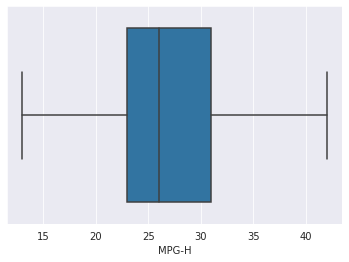

In [174]:
sns.boxplot(x = df['MPG-H'])

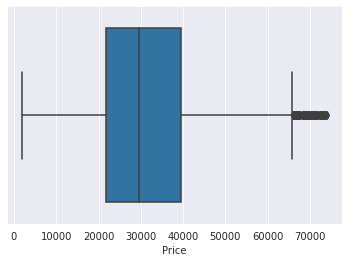

In [175]:
sns.boxplot(x = df['Price'])

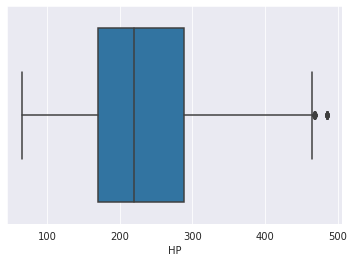

In [176]:
sns.boxplot(x = df['HP'])

# **6.  Most represented Cars**

---



In [177]:
# Percentage of car per brand
counts = df['Make'].value_counts() * 100 / sum(df['Make'].value_counts())
print(counts)

Chevrolet        11.668868
Volkswagen        8.179216
Toyota            7.254513
Nissan            5.691325
GMC               5.228974
Dodge             4.876706
Mazda             4.425363
Honda             4.183179
Suzuki            3.830911
Infiniti          3.566711
Cadillac          3.247468
Hyundai           3.115368
Volvo             2.697050
Audi              2.653016
Subaru            2.608983
Acura             2.597974
BMW               2.487891
Kia               2.399824
Buick             2.058565
Mitsubishi        2.003523
Mercedes-Benz     1.992514
Chrysler          1.904447
Lexus             1.794364
Pontiac           1.728314
Lincoln           1.596213
Oldsmobile        1.265962
Saab              1.221929
Land Rover        1.034786
FIAT              0.649494
Scion             0.605460
Plymouth          0.550418
Porsche           0.363276
Lotus             0.198151
HUMMER            0.187142
Alfa Romeo        0.055042
Maserati          0.044033
Genesis           0.033025
N

In [178]:
# displaying Top 10 car brands 
popular_labels = counts.index[:10]
print(popular_labels)

Index(['Chevrolet', 'Volkswagen', 'Toyota', 'Nissan', 'GMC', 'Dodge', 'Mazda',
       'Honda', 'Suzuki', 'Infiniti'],
      dtype='object')


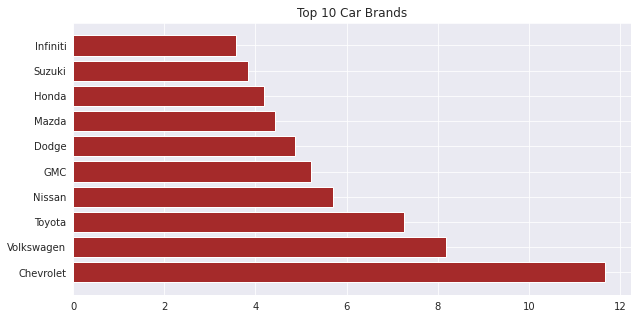

In [179]:
# Plot
plt.figure(figsize=(10,5))
plt.barh(popular_labels, width = counts[:10], color="brown")
plt.title('Top 10 Car Brands')
plt.show()

Now, we are finding the average price among the top car brands

In [180]:
# using mean finding the average price
prices = df[['Make','Price']].loc[(df['Make'] == 'Chevrolet')|
                                  (df['Make'] == 'Ford')|
                                  (df['Make'] == 'Volkswagen')|
                                  (df['Make'] == 'Toyota')|
                                  (df['Make'] == 'Dodge')|
                                  (df['Make'] == 'Nissan')|
                                  (df['Make'] == 'GMC')|
                                  (df['Make'] == 'Honda')|
                                  (df['Make'] == 'Mazda')].groupby('Make').mean()
print(prices)

                   Price
Make                    
Chevrolet   27657.634906
Dodge       25983.345372
GMC         32866.520000
Honda       27511.286842
Mazda       20703.447761
Nissan      28148.655706
Toyota      29223.393020
Volkswagen  28339.133244


# **7.  Correlation Matrix**

---



**Correlation** is an indication about the changes between two variables.

The correlation coefficient is mainly used to deduce the relationship between two variables. However, in a real-world scenario, there are a number of variables that come into play. As such, making a correlation matrix is a great way to summarize all the data. In this way, you can pick the best features and use them for further processing your data.

In [181]:
df.corr()

,Year,HP,Cylinders,MPG-H,MPG-C,Popularity,Price
Year,1.000000,0.330437,-0.103807,0.362741,0.328945,0.202637,0.606315
HP,0.330437,1.000000,0.736645,-0.467307,-0.561740,0.109564,0.739226
Cylinders,-0.103807,0.736645,1.000000,-0.705239,-0.755929,0.029263,0.379072
MPG-H,0.362741,-0.467307,-0.705239,1.000000,0.938849,0.073455,-0.120786
MPG-C,0.328945,-0.561740,-0.755929,0.938849,1.000000,0.064806,-0.192441
Popularity,0.202637,0.109564,0.029263,0.073455,0.064806,1.000000,0.118664
Price,0.606315,0.739226,0.379072,-0.120786,-0.192441,0.118664,1.000000


## High Correlation between



*   Cylinders and HP   
*   Cylinders and Price
*   Highway MPG and City MPG
*   HP and Price








The more cylinders there are, the more powerful the car is.

## High anticorrelation



*   Cylinders and Highway MPG

*   City MPG and Cylinders
  





Engine cylinders/ Highway MPG have a strong negative correlation with highway and City MPG because lower MPG figures means higher fuel consumption

Above we calculated the correlation on the data using the pandas .corr( ) function, and now we store it in the variable corrmat c.
Here, we simply set the figure size of our plot.
And then, we pass the corrmat to the seaborn function heatmap( ) which makes the beautiful plot.

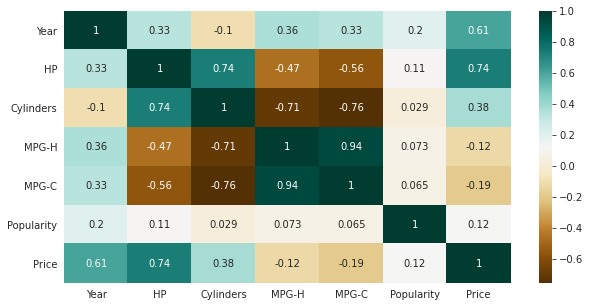

In [182]:
# Lets plot some heatmap to find correlation among the features
plt.figure(figsize=(10,5))
c = df.corr()
sns.heatmap(c,cmap="BrBG" ,annot=True)

# Scatterplot

Scatter plots are used to find the correlation between two variables.
Below, the scatter plots are plotted between HP and Price

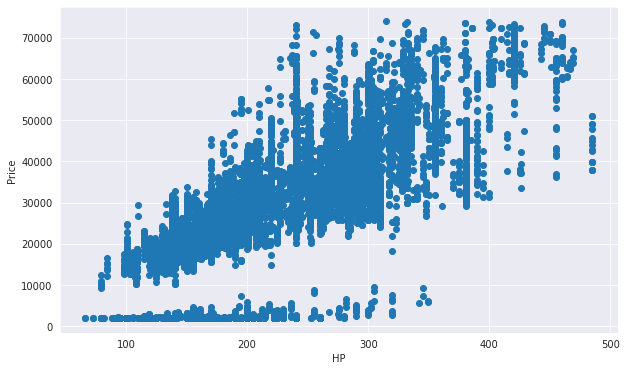

In [183]:
fig, ax = plt.subplots(figsize=(10,6))
plt.scatter(df['HP'], df['Price'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()

## **8.  Checking Effect of variables on car price**

### Which vehicle style segment of cars sold the most?

Text(0, 0.5, 'Number of vehicles')

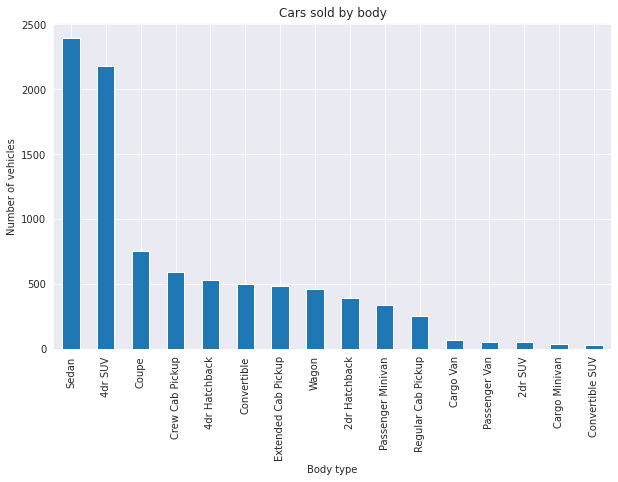

In [184]:
# ploting graph between nuber of vehicles and body type
df['Vehicle Style'].value_counts().plot.bar(figsize=(10,6))
plt.title("Cars sold by body")
plt.xlabel('Body type')
plt.ylabel('Number of vehicles')

Here from the chart we can see that **Sedan** cars were the most sold cars followed by **4dr SUV**

Text(0, 0.5, 'Vehicle Type')

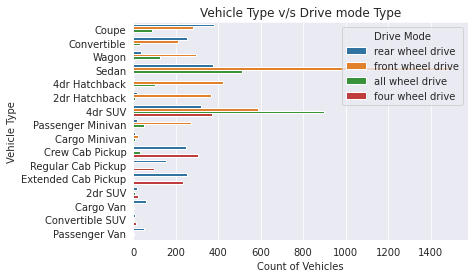

In [185]:
# Vehicle Style type and Drive type analysis
sns.countplot(y='Vehicle Style',data = df, hue = 'Drive Mode')
plt.title("Vehicle Type v/s Drive mode Type")
plt.xlabel('Count of Vehicles')                       # labeling x axis as "Count of Vehicles"
plt.ylabel('Vehicle Type')                            # labeling y axis as "Vehicle Type"

# Making a New group "Price_group"

In [186]:
# create a new column 'Price_group' and assign the value baed on car price
df['price_group'] = pd.cut(df['Price'],[0,20000,40000,60000,80000,100000,600000],
                           labels = ['<20k','20-39k','40-59k','60-79k','80-99k','>100k'],
                           include_lowest = True)
df['price_group'] = df['price_group'].astype(object)

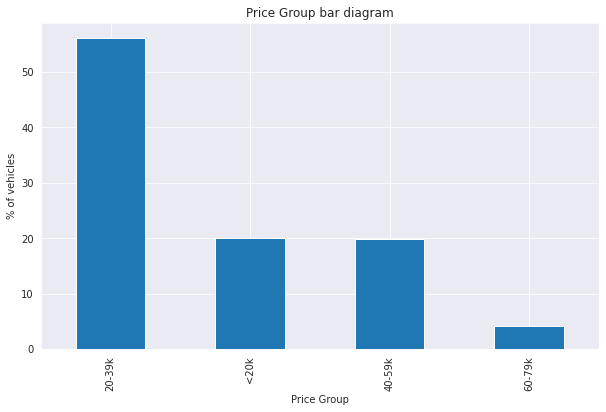

In [187]:
(df['price_group'].value_counts() / len(df) * 100).plot.bar(figsize=(10,6))
plt.title("Price Group bar diagram")
plt.ylabel('% of vehicles')                             # labeling y axis as "% of vehicles"
plt.xlabel('Price Group');                              # labeling x axis as "Price Group"

# **9.  Base ML model**

In [188]:
x = df[['Popularity','Year','HP','Cylinders','MPG-H','MPG-C']].values
y = df['Price'].values

In [189]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_x= StandardScaler()
sc_y= StandardScaler()
x= sc_x.fit_transform(x)
y= sc_y.fit_transform(y.reshape(-1,1))

In [190]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=0)

In [191]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

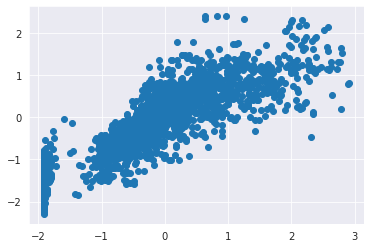

In [192]:
# Predicting the Test set results
y_pred= regressor.predict(x_test)
plt.scatter(y_test,y_pred)

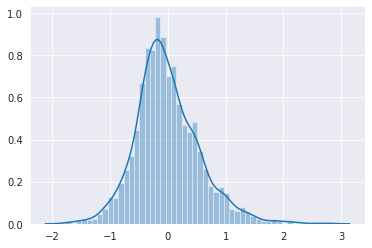

In [193]:
# Creating distplot with custom bin size
sns.distplot((y_test-y_pred),bins=50)

In [194]:
 # sklearn.metrics implements several loss, score, and utility functions to measure classification performance
from sklearn import metrics

# Now, checking the performance of above algorithm over metrices MAE, RMSE and R2 score
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.4209812420961362
Root Mean Squared Error: 0.552637872998591
R2 Score: 0.6924791060229567


# **10.  Spot checking algorithms**

In [195]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4) 
x_poly = poly_reg.fit_transform(x_train) 
poly_reg.fit(x_poly, y_train) 
lin_reg_2 = LinearRegression() 
lin_reg_2.fit(x_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

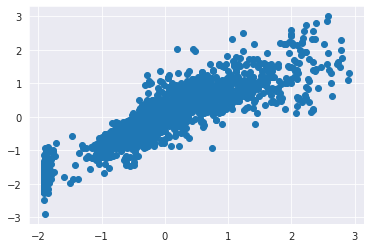

In [196]:
# Predicting a new result with Polynomial Regression  
y_pred = lin_reg_2.predict(poly_reg.fit_transform(x_test))
plt.scatter(y_test, y_pred)

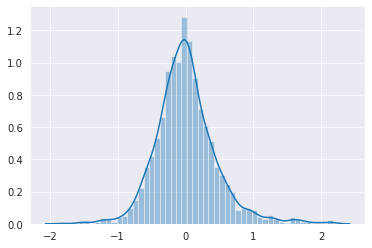

In [197]:
# Creating distplot with custom bin size
sns.distplot((y_test-y_pred),bins = 50)

In [198]:
# Now, checking the performance of above algorithm over metrices MAE, RMSE and R2 score
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.32547842479057826
Root Mean Squared Error: 0.4486269131971162
R2 Score: 0.7973418906897928


In [199]:
# Fitting SVR to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

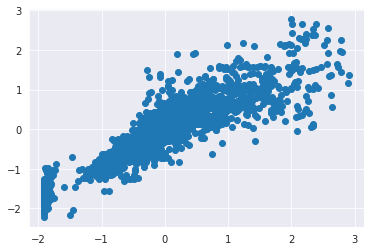

In [200]:
# Predicting a new result
y_pred = regressor.predict(x_test)
plt.scatter(y_test,y_pred)

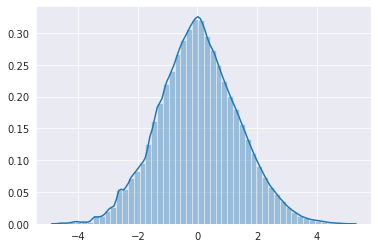

In [201]:
# Creating distplot with custom bin size
sns.distplot((y_test-y_pred),bins = 50)

In [202]:
# Now, checking the performance of above algorithm over metrices MAE, RMSE and R2 score
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.3091972565821545
Root Mean Squared Error: 0.4411739976393367
R2 Score: 0.804019367468253


In [203]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)
regressor.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

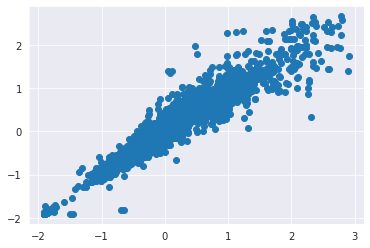

In [204]:
# Predicting the Test set results
y_pred = regressor.predict(x_test)
plt.scatter(y_test,y_pred)

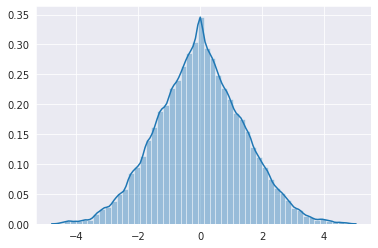

In [205]:
# Creating distplot with custom bin size
sns.distplot((y_test-y_pred),bins = 50)

In [206]:
# Now, checking the performance of above algorithm over metrices MAE, RMSE and R2 score
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.18576949171787943
Root Mean Squared Error: 0.2767746706456247
R2 Score: 0.9228659695334988
